In [1]:
import matplotlib.pyplot as plt
from base import FastQRead
import os

In [2]:
filenames = sorted(os.listdir('data'))[:1]

In [3]:
filenames

['100x.1.fastq']

In [4]:
def plot_all(fastq, title):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    print('Plotting GC')
    fastq.plot_gc(ax=axes[0])
    print('Plotting Pe')
    fastq.plot_error_prob(ax=axes[1])
    print('Plotting quality')
    fastq.plot_quality(ax=axes[2])
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [5]:
def data(filenames):
    for filename in filenames:
        fastq = FastQRead(f'data/{filename}')
        for no_n in [False, True]:
            for skip_bad in [False, True]:
                if no_n and skip_bad:
                    continue
                fastq.no_n = no_n
                fastq.skip_bad = skip_bad
                fastq._max_len = None
                fastq._error_prob = None
                fastq._quality = None
                fastq._gc_content = None
                
                n_string = 'leaving Ns out' if no_n else 'keeping Ns'
                bad_string = 'skipping bad lines' if skip_bad else 'keeping all lines'
                title = f'{filename} {n_string} and {bad_string}'
                print(title)
                plot_all(fastq, title)

100x.1.fastq keeping Ns and keeping all lines
Plotting GC
Plotting Pe
Plotting quality


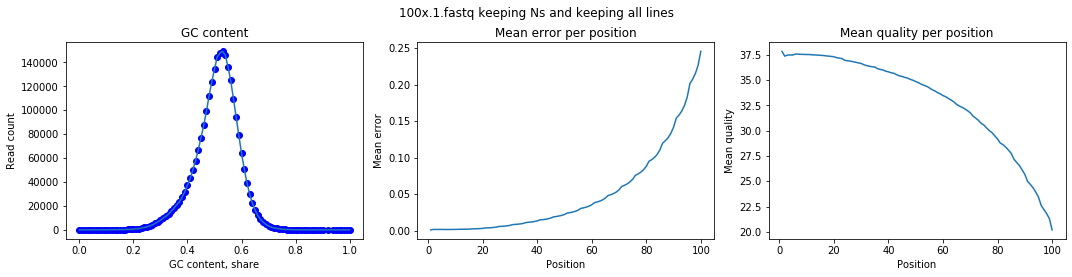

100x.1.fastq keeping Ns and skipping bad lines
Plotting GC
Plotting Pe


In [ ]:
data(filenames)